In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
product_data = pd.read_csv(r'/content/drive/MyDrive/product_data.csv',parse_dates=True)
#product_data.index.freq='D'
product_data.shape

(913000, 4)

In [ ]:
product_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df=product_data

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
# Create Date-related Features to be used for EDA and Supervised ML: Regression
df['weekday'] = df['date'].dt.weekday
df['weekend'] = df['date'].dt.weekday
# df['weekend'] = df['date'].dt.weekday >= 6
# df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
# df['weekend'] = np.where(df.weekend == 0,2, df.weekend)

In [ ]:
df

,date,store,item,sales,weekday,weekend
0,2013-01-01,1,1,13,1,1
1,2013-01-02,1,1,11,2,2
2,2013-01-03,1,1,14,3,3
3,2013-01-04,1,1,13,4,4
4,2013-01-05,1,1,10,5,5
...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2,2
912996,2017-12-28,10,50,59,3,3
912997,2017-12-29,10,50,74,4,4
912998,2017-12-30,10,50,62,5,5


In [ ]:
df['weekend'] = df['weekend'].map({5: 1, 6: 1,0: 0, 1: 0,2: 0, 3: 0,4: 0})
df['weekday'] = df['weekday'].map({5: 0, 6: 0,0: 1, 1: 1,2: 1, 3: 1,4: 1})

In [ ]:
df

,date,store,item,sales,weekday,weekend
0,2013-01-01,1,1,13,1,0
1,2013-01-02,1,1,11,1,0
2,2013-01-03,1,1,14,1,0
3,2013-01-04,1,1,13,1,0
4,2013-01-05,1,1,10,0,1
...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,1,0
912996,2017-12-28,10,50,59,1,0
912997,2017-12-29,10,50,74,1,0
912998,2017-12-30,10,50,62,0,1


In [ ]:
df_input=df[['sales','store', 'item', 'weekday','weekend']]

In [ ]:
df_input.describe()

,sales,store,item,weekday,weekend
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,52.250287,5.500000,25.500000,0.714129,0.285871
std,28.801144,2.872283,14.430878,0.451828,0.451828
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,3.000000,13.000000,0.000000,0.000000
50%,47.000000,5.500000,25.500000,1.000000,0.000000
75%,70.000000,8.000000,38.000000,1.000000,1.000000
max,231.000000,10.000000,50.000000,1.000000,1.000000


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.05627706, 0.        , 0.        , 1.        , 0.        ],
       [0.04761905, 0.        , 0.        , 1.        , 0.        ],
       [0.06060606, 0.        , 0.        , 1.        , 0.        ],
       ...,
       [0.32034632, 1.        , 1.        , 1.        , 0.        ],
       [0.26839827, 1.        , 1.        , 0.        , 1.        ],
       [0.35497835, 1.        , 1.        , 0.        , 1.        ]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.05627706, 0.        , 0.        , 1.        , 0.        ],
         [0.04761905, 0.        , 0.        , 1.        , 0.        ]]]),
 array([0.06060606]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(730400, 5)

In [ ]:
x_test.shape

(182600, 5)

In [ ]:
win_length= 1000
batch_size= 1024
num_features=5
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.05627706, 0.        , 0.        , 1.        , 0.        ],
         [0.04761905, 0.        , 0.        , 1.        , 0.        ],
         [0.06060606, 0.        , 0.        , 1.        , 0.        ],
         ...,
         [0.08658009, 0.        , 0.        , 1.        , 0.        ],
         [0.08658009, 0.        , 0.        , 0.        , 1.        ],
         [0.13852814, 0.        , 0.        , 0.        , 1.        ]],
 
        [[0.04761905, 0.        , 0.        , 1.        , 0.        ],
         [0.06060606, 0.        , 0.        , 1.        , 0.        ],
         [0.05627706, 0.        , 0.        , 1.        , 0.        ],
         ...,
         [0.08658009, 0.        , 0.        , 0.        , 1.        ],
         [0.13852814, 0.        , 0.        , 0.        , 1.        ],
         [0.06493506, 0.        , 0.        , 1.        , 0.        ]],
 
        [[0.06060606, 0.        , 0.        , 1.        , 0.        ],
         [0.05627706, 0.        , 0.       

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 128)         68608     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1000, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 1000, 128)         131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1000, 128)         0         
                                                                 
 dropout (Dropout)           (None, 1000, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=10,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

<ipython-input-24-ceaa8b38dc18>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10,


Epoch 1/10
713/713 [==============================] - 603s 832ms/step - loss: 0.0062 - mean_absolute_error: 0.0573 - val_loss: 0.0038 - val_mean_absolute_error: 0.0473
Epoch 2/10
713/713 [==============================] - 599s 841ms/step - loss: 0.0022 - mean_absolute_error: 0.0356 - val_loss: 0.0013 - val_mean_absolute_error: 0.0279
Epoch 3/10
713/713 [==============================] - 598s 839ms/step - loss: 0.0018 - mean_absolute_error: 0.0320 - val_loss: 0.0013 - val_mean_absolute_error: 0.0276
Epoch 4/10
713/713 [==============================] - 598s 839ms/step - loss: 0.0018 - mean_absolute_error: 0.0324 - val_loss: 0.0013 - val_mean_absolute_error: 0.0276
Epoch 5/10
713/713 [==============================] - 598s 839ms/step - loss: 0.0015 - mean_absolute_error: 0.0299 - val_loss: 0.0016 - val_mean_absolute_error: 0.0296
Epoch 6/10
713/713 [==============================] - 598s 839ms/step - loss: 0.0016 - mean_absolute_error: 0.0308 - val_loss: 0.0013 - val_mean_absolute_error:

In [ ]:
model.evaluate_generator(test_generator, verbose=0)  

<ipython-input-48-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0013197974767535925, 0.027634190395474434]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-49-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

181600

In [ ]:
predictions

array([[0.06066369],
       [0.06851761],
       [0.06999137],
       ...,
       [0.25028843],
       [0.27445486],
       [0.2866219 ]], dtype=float32)

In [ ]:
y_test

array([0.02597403, 0.06493506, 0.02164502, ..., 0.32034632, 0.26839827,
       0.35497835])

In [ ]:
x_test

array([[0.02597403, 0.        , 0.81632653, 1.        , 0.        ],
       [0.06493506, 0.        , 0.81632653, 1.        , 0.        ],
       [0.02164502, 0.        , 0.81632653, 1.        , 0.        ],
       ...,
       [0.32034632, 1.        , 1.        , 1.        , 0.        ],
       [0.26839827, 1.        , 1.        , 0.        , 1.        ],
       [0.35497835, 1.        , 1.        , 0.        , 1.        ]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.        , 0.81632653, 1.        , 0.        ],
       [0.        , 0.81632653, 1.        , 0.        ],
       [0.        , 0.81632653, 1.        , 0.        ],
       ...,
       [1.        , 1.        , 1.        , 0.        ],
       [1.        , 1.        , 0.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        ]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2,3
0,0.060664,0.0,0.816327,1.0,0.0
1,0.068518,0.0,0.816327,1.0,0.0
2,0.069991,0.0,0.816327,1.0,0.0
3,0.074783,0.0,0.816327,1.0,0.0
4,0.078756,0.0,0.816327,1.0,0.0
...,...,...,...,...,...
181595,0.219380,1.0,1.000000,1.0,0.0
181596,0.235620,1.0,1.000000,1.0,0.0
181597,0.250288,1.0,1.000000,1.0,0.0
181598,0.274455,1.0,1.000000,0.0,1.0


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[14.01331128,  1.        , 41.        ,  1.        ,  0.        ],
       [15.82756801,  1.        , 41.        ,  1.        ,  0.        ],
       [16.16800533,  1.        , 41.        ,  1.        ,  0.        ],
       ...,
       [57.81662661, 10.        , 50.        ,  1.        ,  0.        ],
       [63.39907309, 10.        , 50.        ,  0.        ,  1.        ],
       [66.20965853, 10.        , 50.        ,  0.        ,  1.        ]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

sales      181600
store      181600
item       181600
weekday    181600
weekend    181600
dtype: int64

In [ ]:
df_final['Sales_Pred']=rev_trans[:,0]

<ipython-input-61-871fdce951ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Sales_Pred']=rev_trans[:,0]


In [ ]:
df_final

,sales,store,item,weekday,weekend,Sales_Pred
731400,10,1,41,1,0,14.013311
731401,19,1,41,1,0,15.827568
731402,17,1,41,1,0,16.168005
731403,14,1,41,1,0,17.274976
731404,18,1,41,1,0,18.192544
...,...,...,...,...,...,...
912995,63,10,50,1,0,50.676682
912996,59,10,50,1,0,54.428328
912997,74,10,50,1,0,57.816627
912998,62,10,50,0,1,63.399073


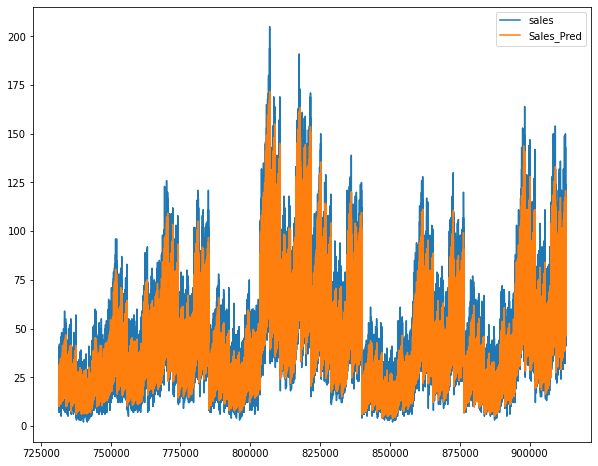

In [ ]:
df_final[['sales','Sales_Pred']].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lstm=sqrt(mean_squared_error(df_final['Sales_Pred'],df_final['sales']))
print('Root Mean Squared Error for LSTM Model is:',rmse_lstm)

Root Mean Squared Error for LSTM Model is: 8.392003065080447


In [ ]:
from sklearn.metrics import r2_score
r2_lstm = r2_score(df_final['sales'], df_final['Sales_Pred'])
print('R Squared Score for LSTM Model is:',r2_lstm)

R Squared Score for LSTM Model is: 0.8903666702494213
